In [1]:
!wget https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip

--2024-10-26 19:06:32--  https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip
Resolving hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)... 3.5.224.142, 16.12.20.26
Connecting to hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)|3.5.224.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131852014 (126M) [application/zip]
Saving to: ‘UTKFace.zip’

UTKFace.zip         100%[===================>] 125.74M  23.7MB/s    in 6.4s    

2024-10-26 19:06:40 (19.5 MB/s) - ‘UTKFace.zip’ saved [131852014/131852014]



In [2]:
!jar xf UTKFace.zip

In [3]:
!ls

__MACOSX  sample_data  UTKFace	UTKFace.zip


In [4]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=676bebbd0dea74b88a12ab09ecefcfde4fecfee860c57ee59eaef8cba0e7452a
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [5]:
from deepface import DeepFace
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import glob
import os

24-10-26 19:07:21 - Directory /root/.deepface has been created
24-10-26 19:07:21 - Directory /root/.deepface/weights has been created


In [6]:
image_paths = sorted(glob.glob("UTKFace/*.jpg.chip.jpg"))
print(image_paths[0])

UTKFace/100_0_0_20170112213500903.jpg.chip.jpg


In [7]:
image_paths = sorted(glob.glob("UTKFace/*.jpg.chip.jpg"), key = lambda x: int(x.replace("UTKFace/", "").split("_")[0]))

images = []
ages = []
genders = []
races = []

for path in image_paths:
    filename = path[8:].split("_")
    if len(filename)==4:
        images.append(np.array(Image.open(path)))
        ages.append(int(filename[0]))
        genders.append(int(filename[1]))
        races.append(int(filename[2]))

In [8]:
dataset_dict = {
    'race_id': {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Other'
    },
    'gender_id': { 0: 'Male', 1: 'Female'
    }
}

In [9]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [10]:
rand_ind = 3000
samples = 1

In [11]:
deepface_ages = [DeepFace.analyze(img_path = img, actions = ['age', 'gender'], enforce_detection = False, detector_backend = "mediapipe") for img in image_paths[rand_ind:rand_ind + samples]]

print(deepface_ages[0])

Action: age:   0%|          | 0/2 [00:00<?, ?it/s]    

24-10-26 19:08:12 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 8.39M/539M [00:00<00:06, 79.2MB/s]
  3%|▎         | 16.8M/539M [00:00<00:08, 61.9MB/s]
  5%|▍         | 25.7M/539M [00:00<00:13, 38.0MB/s]
  6%|▌         | 32.0M/539M [00:00<00:12, 40.5MB/s]
  7%|▋         | 37.7M/539M [00:00<00:12, 39.3MB/s]
 10%|█         | 54.0M/539M [00:00<00:07, 66.8MB/s]
 12%|█▏        | 62.4M/539M [00:01<00:07, 60.7MB/s]
 13%|█▎        | 69.7M/539M [00:01<00:11, 42.1MB/s]
 14%|█▍        | 75.5M/539M [00:01<00:11, 42.0MB/s]
 16%|█▋        | 88.1M/539M [00:01<00:07, 58.0MB/s]
 18%|█▊        | 99.1M/539M [00:01<00:06, 69.0MB/s]
 21%|██        | 114M/539M [00:01<00:04, 88.2MB/s] 
 23%|██▎       | 125M/539M [00:02<00:04, 89.7MB/s]
 26%|██▌       | 138M/539M [00:02<00:04, 96.4MB/s]
 28%|██▊       | 150M/539M [00:02<00:03, 102MB/s] 
 31%|███       | 168M

24-10-26 19:08:28 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:07, 66.2MB/s]
  4%|▍         | 24.1M/537M [00:00<00:05, 96.0MB/s]
  8%|▊         | 40.4M/537M [00:00<00:04, 122MB/s] 
 10%|▉         | 53.5M/537M [00:00<00:04, 99.6MB/s]
 12%|█▏        | 64.5M/537M [00:01<00:09, 48.1MB/s]
 14%|█▍        | 75.5M/537M [00:01<00:07, 58.2MB/s]
 16%|█▋        | 88.6M/537M [00:01<00:06, 71.9MB/s]
 20%|█▉        | 105M/537M [00:01<00:04, 91.1MB/s] 
 22%|██▏       | 117M/537M [00:01<00:04, 91.8MB/s]
 25%|██▍       | 134M/537M [00:01<00:03, 108MB/s] 
 27%|██▋       | 147M/537M [00:01<00:03, 102MB/s]
 31%|███       | 167M/537M [00:01<00:02, 124MB/s]
 34%|███▎      | 181M/537M [00:01<00:03, 116MB/s]
 37%|███▋      | 200M/537M [00:02<00:02, 117MB/s]
 40%|███▉      | 212M/537M [00:02<00:03, 104MB/s]
 43%|████▎     | 230M/53

[{'age': 34, 'region': {'x': 6, 'y': 9, 'w': 173, 'h': 173, 'left_eye': (134, 68), 'right_eye': (60, 67)}, 'face_confidence': 0.79, 'gender': {'Woman': 17.60580986738205, 'Man': 82.39418268203735}, 'dominant_gender': 'Man'}]


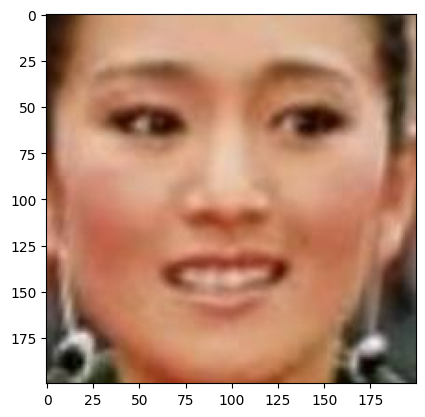

Age: 40
Gender: Female
Race: Asian


In [24]:
idx = np.random.randint(len(images))# Hint: Try 19006 for someone who's gonna yell motherfucka at you!
plt.imshow(images[idx])
plt.show()

print("Age: "+str(ages[idx]))
print("Gender: "+str(dataset_dict['gender_id'][genders[idx]]))
print("Race: "+str(dataset_dict['race_id'][races[idx]]))

In [13]:
!git clone https://github.com/WildChlamydia/MiVOLO.git
%cd MiVOLO

Cloning into 'MiVOLO'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 257 (delta 63), reused 46 (delta 46), pack-reused 175 (from 1)
Receiving objects: 100% (257/257), 633.30 KiB | 13.77 MiB/s, done.
Resolving deltas: 100% (141/141), done.
/content/MiVOLO


In [14]:
%pip install -r requirements.txt
%pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.6/171.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.2/699.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.11
    Uninstalling timm-1.0.11:
      Successfully uninstal

In [15]:
!python3 demo.py \
--input "https://www.youtube.com/watch?v=DxLJnxAuVtI" \
--output "output" \
--detector-weights "models/yolov8x_person_face.pt" \
--checkpoint "models/model_imdb_cross_person_4.22_99.46.pth.tar" \
--device "cuda:0" \
--draw \
--with-persons

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:634: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location="cpu"), file  # load


In [25]:
%wget 'https://variety.com/wp-content/uploads/2023/04/MCDNOHA_SP001.jpg' -O 'jennifer_lawrence.jpg'

python3 demo.py \
--input "jennifer_lawrence.jpg" \
--output "output" \
--detector-weights "models/yolov8x_person_face.pt " \
--checkpoint "models/mivolo_imbd.pth.tar" \
--device "cuda:0" \
--with-persons \
--draw

SyntaxError: invalid syntax (<ipython-input-25-5d5eebca8635>, line 3)